<a href="https://colab.research.google.com/github/noushin94/NLP/blob/main/NLP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import spacy
from spacy.matcher import Matcher
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# **Resume Classification**

In [ ]:
# Load the dataset
df=pd.read_csv('/content/Resume.csv')

FileNotFoundError: ignored

In [ ]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [ ]:
# finding out different job titles in csv file
for value in df['Category'].unique():
  print(value)

HR
DESIGNER
INFORMATION-TECHNOLOGY
TEACHER
ADVOCATE
BUSINESS-DEVELOPMENT
HEALTHCARE
FITNESS
AGRICULTURE
BPO
SALES
CONSULTANT
DIGITAL-MEDIA
AUTOMOBILE
CHEF
FINANCE
APPAREL
ENGINEERING
ACCOUNTANT
CONSTRUCTION
PUBLIC-RELATIONS
BANKING
ARTS
AVIATION


In [ ]:
job_categories = df['Category'].unique()

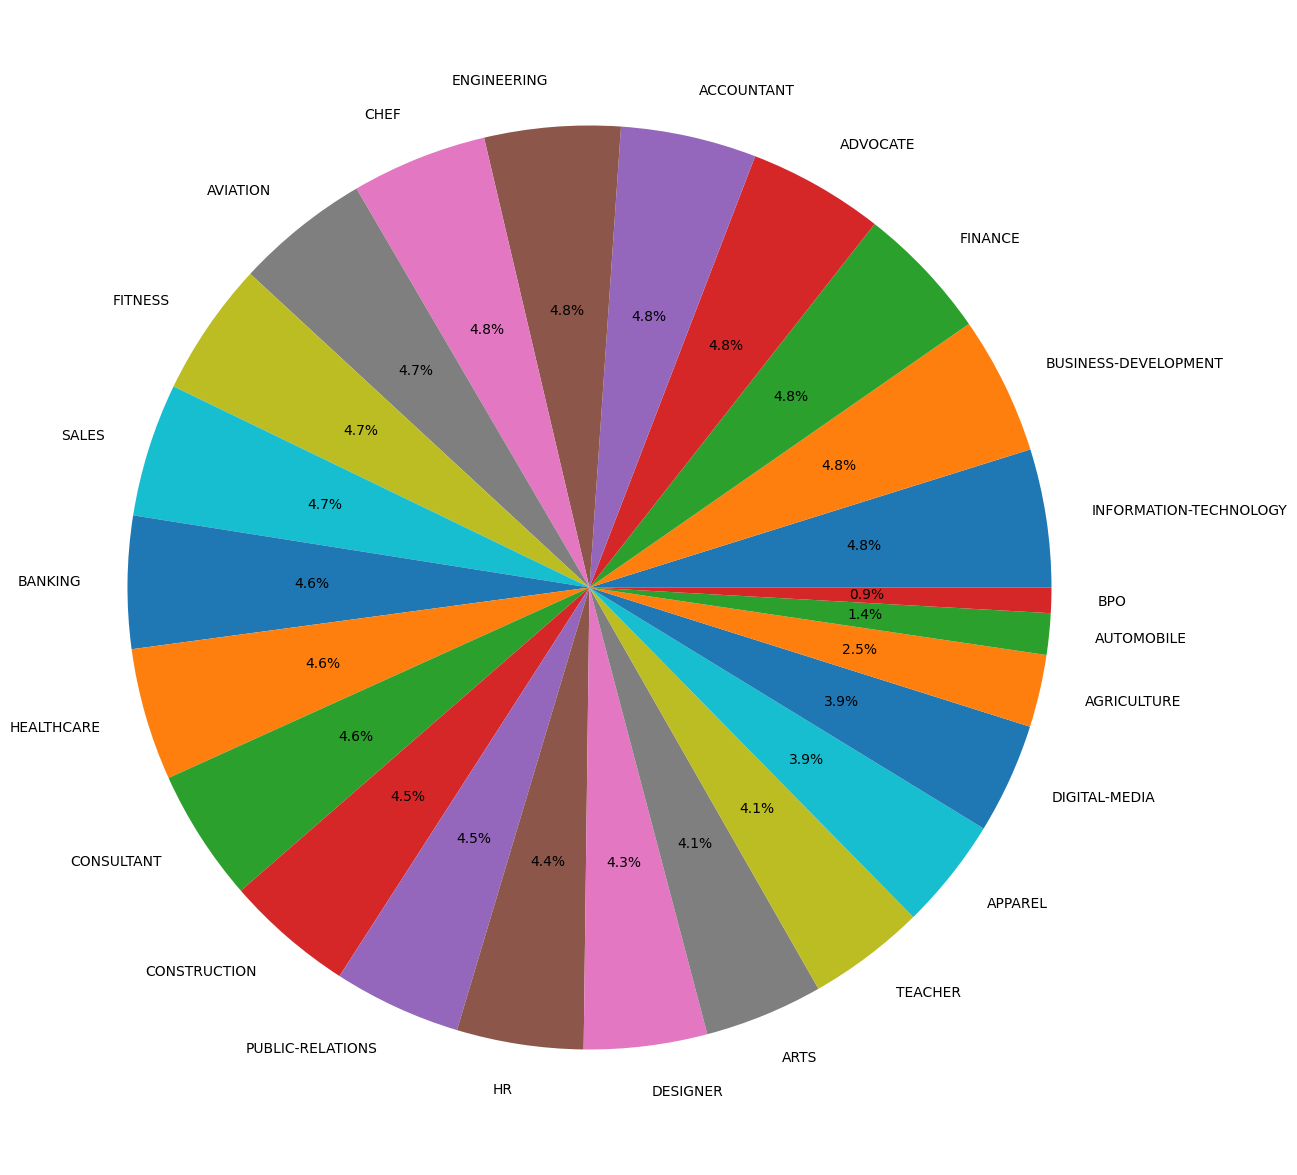

In [ ]:
category=df['Category'].value_counts().reset_index()
category

plt.figure(figsize=(15,15))
plt.pie(category['Category'],labels=category['index'], colors=None, autopct='%1.1f%%')
plt.show()

# data preprocessing


**data cleaning**

In [ ]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, URLs, and email addresses
    text = re.sub(r'http\S+|www\S+|https\S+|email\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Apply masking to escape sequences
    text = text.replace('\n', ' ')
    # Mask numbers and string fragmentations
    text = re.sub(r'\d+', 'NUM', text)
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub(r'\b\w\b', '', text)
    return text

In [ ]:
df['cleaned_text'] = df['Resume_str'].apply(clean_text)

In [ ]:
df # the cleaned text has been added

,ID,Resume_str,Resume_html,Category,cleaned_text
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administrator/marketing associate ...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"hr specialist, us hr operations ..."
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary over N...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedica...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights ...
...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,rank: sgt/-NUM non- commissioned offi...
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,"government relations, communications ..."
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,geek squad agent professional...
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,program director / office manager ...


**work tokentisation and stop word**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Word Tokenization and Stopwords Removal
stop_words = set(stopwords.words('english')) # the standard english language stop word  is implemented
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


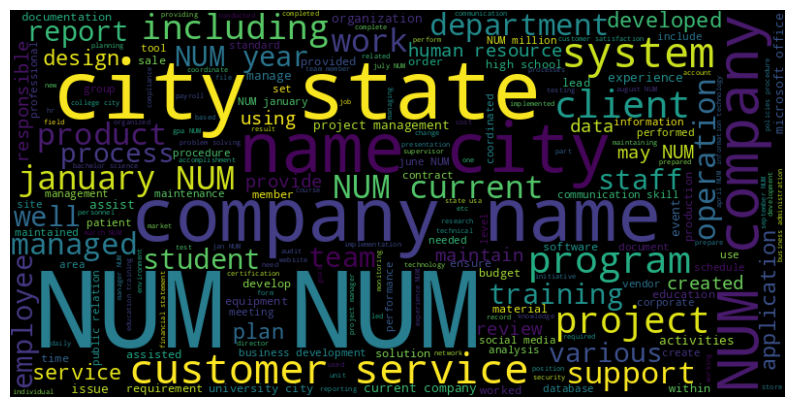

In [ ]:
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**stemming and lemmatization**

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# text normalizing
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([stemmer.stem(lemmatizer.lemmatize(word)) for word in x.split()]))


**visualization of stop words**

In [ ]:
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


**label encoding**

In [ ]:
# converting categorical to numerical
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [ ]:
df

# feature Engineering

In [ ]:
# Feature Engineering with TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['Category']

## spliting data to train and test

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# classification

In [ ]:

# Classification Models
classifiers = [RandomForestClassifier(), GradientBoostingClassifier(), MultinomialNB(),   SVC(kernel='linear')
]

for classifier in classifiers:
    # Training the model
    model = classifier.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    # Print results
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_report_str)
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: RandomForestClassifier
Accuracy: 0.74
Confusion Matrix:
[[27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  1  0  0  0  1]
 [ 1  0  2  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  2]
 [ 0  0  0 11  2  0  0  1  0  0  0  0  0  1  0  2  0  0  0  0  1  0  2  0]
 [ 0  0  0  1  7  0  0  0  0  0  1  0  0  1  0  2  0  0  0  3  0  1  1  1]
 [ 0  1  1  0  2  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  1  0  0  0  0  2  0  0  0]
 [ 2  0  0  0  0  0  0 14  0  0  0  0  1  0  0  0  4  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 24  0  0  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 0  1  0  0  1  0  1  1  0  1 18  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  2  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: SVC
Accuracy: 0.63
Confusion Matrix:
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  1  0  0  0  0  0]
 [ 0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  9  1  1  1  1  0]
 [ 1  0  1  0  0  0  1  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  1  2]
 [ 0  2  0  7  2  0  0  0  0  0  0  0  0  1  0  2  0  2  0  0  0  0  3  1]
 [ 0  0  0  1  5  0  0  0  0  0  1  0  1  1  0  1  1  0  1  1  2  0  1  2]
 [ 0  3  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 1  0  1  0  0  0  0 15  0  0  0  0  2  0  0  1  3  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 19  0  0  0  0  0  1  0  0  3  0  0  1  2  0]
 [ 0  2  0  1  2  0  1  0  0  0 16  0  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0  0  0  1  1  0  2  0  0  0  0 25  0  1  0  2  0  1  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0  0  0  1  8  0  1  1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Resume Parsing**

In [1]:
#importing all required libraries
!pip install PyPDF2
import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.7 MB/s eta 0:00:00


In [21]:
import os
from PyPDF2 import PdfReader
import spacy
import re

In [22]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [23]:
# Your template_data dictionary
template_data = {
    'Networking': ['TCP/IP', 'DNS', 'Firewalls', 'LAN', 'WAN', 'VPN', 'Cisco ASA', 'NMap', 'ZenMap'],
    'System Administration': ['server management', 'troubleshooting', 'security', 'Active Directory', 'Group Policy Objects', 'PowerShell', 'VBScript', 'Domain Controllers', 'NTFS security permissions'],
    'IT Infrastructure': ['cloud computing', 'virtualization', 'network architecture', 'Azure', 'StorSimple', 'DataDomain', 'EMC', 'Enterprise Vault', 'ePO', 'Symantec Veritas Netbackup', 'VMWare', 'VDI'],
    'Programming': ['scripting', 'automation', 'shell scripting', 'HTML', 'CSS', 'VB.Net', 'Bash', 'T-SQL', 'C++', 'Java', 'JSP', 'MVC 4'],
    'Database Management': ['SQL', 'database optimization', 'data migration', 'SQL Server', 'MySQL', 'Database Design'],
    'Cybersecurity': ['threat detection', 'vulnerability assessment', 'incident response', 'firewall', 'security policies', 'McAfee', 'ePO', 'TMG', 'Security Certifications'],
    'Collaboration Tools': ['version control', 'ticketing systems', 'communication platforms', 'Microsoft Office 365', 'Office 365 migration', 'SharePoint', 'Systems Management Server (SMS)', 'Unified Communication']
}

In [24]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PdfReader(file)
        text = ''
        for page_num in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_num].extract_text()
    return text


In [25]:

def extract_contact_info(text):
    phone_numbers = re.findall(r'\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b', text)
    email_addresses = re.findall(r'\S+@\S+', text)
    return phone_numbers, email_addresses

In [26]:
def extract_skills(text):
    doc = nlp(text)
    skills = [token.text for token in doc if token.text in set(skill for skills_list in template_data.values() for skill in skills_list)]
    return skills

In [27]:
def extract_education(text):
    education_section = re.search(r'Education(.+)', text, re.IGNORECASE)
    if education_section:
        education_text = education_section.group(1)
        return education_text.strip()
    return None

In [28]:
def extract_candidate_name(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            return ent.text
    return None

In [30]:
# Define the folder name
folder_name = "Information_Technology"

# Create the folder if it doesn't exist
folder_path = "/content/" + folder_name  # Specify the full path in Colab
os.makedirs(folder_path, exist_ok=True)

print(f"The folder '{folder_name}' has been created at '{folder_path}'.")


The folder 'Information_Technology' has been created at '/content/Information_Technology'.


In [32]:
# Directory containing PDF resumes
resumes_directory = '/content/Information_Technology'

In [33]:
# List to store resume information and matching scores
resumes_info = []

# Iterate through all PDF files in the directory
for filename in os.listdir(resumes_directory):
    if filename.endswith('.pdf'):
        resume_path = os.path.join(resumes_directory, filename)

        # Extract information from the resume
        text = extract_text_from_pdf(resume_path)
        contact_info, skills, education, candidate_name = extract_contact_info(text), extract_skills(text), extract_education(text), extract_candidate_name(text)

        # Calculate matching score based on job skills
        matching_score = sum(len(set(skills) & set(template_data[category])) for category in template_data)

        # Store resume information and matching score
        resumes_info.append({
            'resume_path': resume_path,
            'contact_info': contact_info,
            'skills': skills,
            'education': education,
            'candidate_name': candidate_name,
            'matching_score': matching_score
        })

# Sort resumes based on matching score in descending order
resumes_info.sort(key=lambda x: x['matching_score'], reverse=True)


In [34]:
# Display the top 10 resumes
for i, resume_info in enumerate(resumes_info[:10]):
    print(f"\nTop {i+1} Resume:")
    print(f"Resume Path: {resume_info['resume_path']}")
    print(f"Contact Information: Phone - {resume_info['contact_info'][0]}, Email - {resume_info['contact_info'][1]}")
    print(f"Skills: {', '.join(resume_info['skills'])}")
    print(f"Educational Qualifications: {resume_info['education']}")
    print(f"Candidate's Name: {resume_info['candidate_name']}")
    print(f"Matching Score: {resume_info['matching_score']}")



Top 1 Resume:
Resume Path: /content/Information_Technology/10089434.pdf
Contact Information: Phone - [], Email - []
Skills: troubleshooting, security, PowerShell, VBScript, VMWare, Azure, Azure, Azure, StorSimple, LAN, security, security, DataDomain, McAfee, virtualization, VDI, PowerShell, McAfee, SharePoint, LAN, WAN, security, DNS, VPN, security, C++, Java, JSP, HTML, CSS, VB.Net, Bash, SQL, Azure, Bash, DNS, DataDomain, EMC, ePO, firewall, HTML, McAfee, security, PowerShell, SQL, StorSimple, troubleshooting, TMG, VPN, VMWare, VDI, NMap, ZenMap
Educational Qualifications: programs to explain upgrades to end users.
Candidate's Name: Detail
Matching Score: 31

Top 2 Resume:
Resume Path: /content/Information_Technology/10641230.pdf
Contact Information: Phone - [], Email - []
Skills: troubleshooting, automation, troubleshooting, Java, troubleshooting, HTML, CSS, troubleshooting, Java, security, security, troubleshooting, CSS, HTML, security, Java, Java
Educational Qualifications: and c